<a href="https://colab.research.google.com/github/BahauddinKalyani/EasyMinutes/blob/main/Keywords_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install datasets transformers scikit-learn spacy

In [2]:
# pip install spacy download en_core_web_sm

In [3]:
# pip install transformers[torch] accelerate -U

In [4]:
import os
import pandas as pd

In [5]:
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [6]:
# Given the challenge with directly inputting the lengthy list, let's simplify the process by manually constructing the new paths based on the given pattern.

# Manually constructing the new paths array based on the given filenames pattern
base_path = '/content/drive/MyDrive/ami/'
suffix = '.ducref.abstract'
meeting_ids = [
    'ES2002a', 'ES2002b', 'ES2002c', 'ES2002d',
    'ES2003a', 'ES2003b', 'ES2003c', 'ES2003d',
    'ES2004a', 'ES2004b', 'ES2004c', 'ES2004d',
    'ES2005a', 'ES2005b', 'ES2005c', 'ES2005d',
    'ES2006a', 'ES2006b', 'ES2006c', 'ES2006d',
    'ES2007a', 'ES2007b', 'ES2007c', 'ES2007d',
    'ES2008a', 'ES2008b', 'ES2008c', 'ES2008d',
    'ES2009a', 'ES2009b', 'ES2009c', 'ES2009d',
    'ES2010a', 'ES2010b', 'ES2010c', 'ES2010d',
    'ES2011a', 'ES2011b', 'ES2011c', 'ES2011d',
    'ES2012a', 'ES2012b', 'ES2012c', 'ES2012d',
    'ES2013a', 'ES2013b', 'ES2013c', 'ES2013d',
    'ES2014a', 'ES2014b', 'ES2014c', 'ES2014d',
    'ES2015a', 'ES2015b', 'ES2015c', 'ES2015d',
    'ES2016a', 'ES2016b', 'ES2016c', 'ES2016d',
    'IS1000a', 'IS1000b', 'IS1000c', 'IS1000d',
    'IS1001a', 'IS1001b', 'IS1001c', 'IS1001d',
    'IS1002b', 'IS1002c', 'IS1002d',
    'IS1003a', 'IS1003b', 'IS1003c', 'IS1003d',
    'IS1004a', 'IS1004b', 'IS1004c', 'IS1004d',
    'IS1005a', 'IS1005b', 'IS1005c',
    'IS1006a', 'IS1006b', 'IS1006c', 'IS1006d',
    'IS1007a', 'IS1007b', 'IS1007c', 'IS1007d',
    'IS1008a', 'IS1008b', 'IS1008c', 'IS1008d',
    'IS1009a', 'IS1009b', 'IS1009c', 'IS1009d',
    'TS3003a', 'TS3003b', 'TS3003c', 'TS3003d',
    'TS3004a', 'TS3004b', 'TS3004c', 'TS3004d',
    'TS3005a', 'TS3005b', 'TS3005c', 'TS3005d',
    'TS3006a', 'TS3006b', 'TS3006c', 'TS3006d',
    'TS3007a', 'TS3007b', 'TS3007c', 'TS3007d',
    'TS3008a', 'TS3008b', 'TS3008c', 'TS3008d',
    'TS3009a', 'TS3009b', 'TS3009c', 'TS3009d',
    'TS3010a', 'TS3010b', 'TS3010c', 'TS3010d',
    'TS3011a', 'TS3011b', 'TS3011c', 'TS3011d',
    'TS3012a', 'TS3012b', 'TS3012d'
]

abstract_files = [base_path + meeting_id + suffix for meeting_id in meeting_ids]

abstract_files[:5]  # Displaying the first 5 entries as a sample


['/content/drive/MyDrive/ami/ES2002a.ducref.abstract',
 '/content/drive/MyDrive/ami/ES2002b.ducref.abstract',
 '/content/drive/MyDrive/ami/ES2002c.ducref.abstract',
 '/content/drive/MyDrive/ami/ES2002d.ducref.abstract',
 '/content/drive/MyDrive/ami/ES2003a.ducref.abstract']

In [7]:
file_names = [
    'ES2002a.transcript.txt', 'ES2002b.transcript.txt', 'ES2002c.transcript.txt', 'ES2002d.transcript.txt',
    'ES2003a.transcript.txt', 'ES2003b.transcript.txt', 'ES2003c.transcript.txt', 'ES2003d.transcript.txt',
    'ES2004a.transcript.txt', 'ES2004b.transcript.txt', 'ES2004c.transcript.txt', 'ES2004d.transcript.txt',
    'ES2005a.transcript.txt', 'ES2005b.transcript.txt', 'ES2005c.transcript.txt', 'ES2005d.transcript.txt',
    'ES2006a.transcript.txt', 'ES2006b.transcript.txt', 'ES2006c.transcript.txt', 'ES2006d.transcript.txt',
    'ES2007a.transcript.txt', 'ES2007b.transcript.txt', 'ES2007c.transcript.txt', 'ES2007d.transcript.txt',
    'ES2008a.transcript.txt', 'ES2008b.transcript.txt', 'ES2008c.transcript.txt', 'ES2008d.transcript.txt',
    'ES2009a.transcript.txt', 'ES2009b.transcript.txt', 'ES2009c.transcript.txt', 'ES2009d.transcript.txt',
    'ES2010a.transcript.txt', 'ES2010b.transcript.txt', 'ES2010c.transcript.txt', 'ES2010d.transcript.txt',
    'ES2011a.transcript.txt', 'ES2011b.transcript.txt', 'ES2011c.transcript.txt', 'ES2011d.transcript.txt',
    'ES2012a.transcript.txt', 'ES2012b.transcript.txt', 'ES2012c.transcript.txt', 'ES2012d.transcript.txt',
    'ES2013a.transcript.txt', 'ES2013b.transcript.txt', 'ES2013c.transcript.txt', 'ES2013d.transcript.txt',
    'ES2014a.transcript.txt', 'ES2014b.transcript.txt', 'ES2014c.transcript.txt', 'ES2014d.transcript.txt',
    'ES2015a.transcript.txt', 'ES2015b.transcript.txt', 'ES2015c.transcript.txt', 'ES2015d.transcript.txt',
    'ES2016a.transcript.txt', 'ES2016b.transcript.txt', 'ES2016c.transcript.txt', 'ES2016d.transcript.txt',
    'IS1000a.transcript.txt', 'IS1000b.transcript.txt', 'IS1000c.transcript.txt', 'IS1000d.transcript.txt',
    'IS1001a.transcript.txt', 'IS1001b.transcript.txt', 'IS1001c.transcript.txt', 'IS1001d.transcript.txt',
    'IS1002b.transcript.txt', 'IS1002c.transcript.txt', 'IS1002d.transcript.txt',
    'IS1003a.transcript.txt', 'IS1003b.transcript.txt', 'IS1003c.transcript.txt', 'IS1003d.transcript.txt',
    'IS1004a.transcript.txt', 'IS1004b.transcript.txt', 'IS1004c.transcript.txt', 'IS1004d.transcript.txt',
    'IS1005a.transcript.txt', 'IS1005b.transcript.txt', 'IS1005c.transcript.txt',
    'IS1006a.transcript.txt', 'IS1006b.transcript.txt', 'IS1006c.transcript.txt', 'IS1006d.transcript.txt',
    'IS1007a.transcript.txt', 'IS1007b.transcript.txt', 'IS1007c.transcript.txt', 'IS1007d.transcript.txt',
    'IS1008a.transcript.txt', 'IS1008b.transcript.txt', 'IS1008c.transcript.txt', 'IS1008d.transcript.txt',
    # Continuing the pattern for the rest of the file names...
]

# Modify the path for each file name
transcript_files= ['/content/drive/MyDrive/transcript/' + file_name for file_name in file_names]

In [8]:
# Function to read a file
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Creating lists to store the data
file_names = []
transcripts = []
abstracts = []

# Assuming each transcript file has a corresponding abstract file
for transcript_file, abstract_file in zip(transcript_files, abstract_files):
    file_names.append(os.path.basename(transcript_file).split('.')[0])  # Assuming file name format is consistent
    transcripts.append(read_file(transcript_file))
    abstracts.append(read_file(abstract_file))

# Creating the DataFrame
dataset = pd.DataFrame({
    'File Name': file_names,
    'Transcript': transcripts,
    'Abstract': abstracts
})

dataset.head()  # Display the first few rows of the DataFrame


,File Name,Transcript,Abstract
0,ES2002a,"hi, i'm david and i'm supposed to be an indust...",The project manager introduced the upcoming pr...
1,ES2002b,"mm yeah. nope, we're all set. which which is t...",The project manager briefed the team on some n...
2,ES2002c,'s to do now is to decide how to fulfil what y...,The project manager recapped the decisions mad...
3,ES2002d,"no. ninja homer, made in japan. and there isn'...",The project manager recapped the decisions mad...
4,ES2003a,"uh, dave cochrane. user interface defin design...",The team members introduced themselves to each...


In [9]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

# Function to tokenize a piece of text into sentences
def tokenize_to_sentences(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents]

# Tokenize 'Transcript' and 'Abstract', then explode to have one sentence per row
dataset['Sentences'] = dataset['Transcript'].apply(tokenize_to_sentences) + dataset['Abstract'].apply(tokenize_to_sentences)
df_exploded = dataset.explode('Sentences')

# Now df_exploded has one sentence per row in the 'Sentences' column

In [10]:
def enhanced_classify_sentence(sentence):
    doc = nlp(sentence)
    action_found = False

    for token in doc:
        # Check for action verbs
        if token.pos_ == "VERB":
            # Look for direct objects or entities associated with the verb
            for child in token.children:
                if child.dep_ in ["dobj", "pobj"]:  # Direct or prepositional objects
                    action_found = True
                    break
                if child.ent_type_:  # Check if the child is a named entity
                    action_found = True
                    break

            # Check for subjects related to the verb, enhancing understanding of action context
            if token.head.pos_ in ["NOUN", "PROPN"] and token.dep_ in ["nsubj", "nsubjpass"]:
                action_found = True

        if action_found:
            break

    return "Action" if action_found else "Non-Action"

# Apply the enhanced classification
df_exploded['Enhanced_Classification'] = df_exploded['Sentences'].apply(enhanced_classify_sentence)


In [11]:
df_exploded['Enhanced_Classification'] = df_exploded['Enhanced_Classification'].map({'Action': 1, 'Non-Action': 0})

In [12]:
pip install datasets

In [13]:
from datasets import Dataset

# Assuming `data` is your dataset in a format compatible with Hugging Face's Dataset
dataset = Dataset.from_dict(df_exploded)

# Split the dataset
train_testvalid = dataset.train_test_split(test_size=0.2)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)
train_dataset = train_testvalid['train']
test_dataset = test_valid['train']
valid_dataset = test_valid['test']

In [14]:
pip install transformers[torch] accelerate -U

In [15]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) # Assuming binary classification

# Tokenization function that also includes the labels
def tokenize_and_encode_labels(examples):
    # Tokenize the text
    tokenized_inputs = tokenizer(examples['Sentences'], padding='max_length', truncation=True, max_length=128)
    # Include the labels (ensure they are in examples and adjust 'Labels' if using a different column name)
    tokenized_inputs['labels'] = examples['Enhanced_Classification']
    return tokenized_inputs

# Apply the tokenization and encoding function
train_dataset = train_dataset.map(tokenize_and_encode_labels, batched=True)
eval_dataset = valid_dataset.map(tokenize_and_encode_labels, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/43538 [00:00<?, ? examples/s]

Map:   0%|          | 0/5443 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Step,Training Loss
10,0.634600
20,0.664000
30,0.597700
40,0.603500
50,0.548800
60,0.512900
70,0.532900
80,0.364000
90,0.324500
100,0.370600


Step,Training Loss
10,0.634600
20,0.664000
30,0.597700
40,0.603500
50,0.548800
60,0.512900
70,0.532900
80,0.364000
90,0.324500
100,0.370600


TrainOutput(global_step=16329, training_loss=0.10699808480653172, metrics={'train_runtime': 3351.888, 'train_samples_per_second': 38.967, 'train_steps_per_second': 4.872, 'total_flos': 8591496846197760.0, 'train_loss': 0.10699808480653172, 'epoch': 3.0})

In [16]:
def predict_action_items(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    predictions = outputs.logits.argmax(-1)
    return "Action" if predictions == 1 else "Non-Action"

In [18]:
test_dataset = test_dataset.map(tokenize_and_encode_labels, batched=True)

Map:   0%|          | 0/5442 [00:00<?, ? examples/s]

In [19]:
test_results = trainer.evaluate(test_dataset)

# Print the evaluation results
print(test_results)

{'eval_loss': 0.1450822502374649, 'eval_runtime': 36.413, 'eval_samples_per_second': 149.452, 'eval_steps_per_second': 18.702, 'epoch': 3.0}


In [21]:
# Get raw model predictions
raw_pred, _, _ = trainer.predict(test_dataset)

# For a classification task, you might want to convert these logits to probabilities and then to actual class predictions
import numpy as np
from scipy.special import softmax

# Convert logits to probabilities
probabilities = softmax(raw_pred, axis=1)

# Convert probabilities to class predictions
predictions = np.argmax(probabilities, axis=1)

# If you have the actual labels for your test dataset, you can compare them to your predictions
if "labels" in test_dataset.column_names:
    actual_labels = test_dataset['labels']
    # Calculate the accuracy or other metrics as needed
    accuracy = np.mean(predictions == actual_labels)
    print("Accuracy on test set:", accuracy)

# If you want to see the actual predictions for each example
for i, prediction in enumerate(predictions):
    print(f"Test example {i} predicted as: {prediction}")

Streaming output truncated to the last 5000 lines.
Test example 442 predicted as: 1
Test example 443 predicted as: 1
Test example 444 predicted as: 1
Test example 445 predicted as: 1
Test example 446 predicted as: 1
Test example 447 predicted as: 0
Test example 448 predicted as: 0
Test example 449 predicted as: 0
Test example 450 predicted as: 0
Test example 451 predicted as: 0
Test example 452 predicted as: 0
Test example 453 predicted as: 0
Test example 454 predicted as: 1
Test example 455 predicted as: 0
Test example 456 predicted as: 1
Test example 457 predicted as: 0
Test example 458 predicted as: 0
Test example 459 predicted as: 0
Test example 460 predicted as: 0
Test example 461 predicted as: 0
Test example 462 predicted as: 0
Test example 463 predicted as: 0
Test example 464 predicted as: 0
Test example 465 predicted as: 0
Test example 466 predicted as: 1
Test example 467 predicted as: 0
Test example 468 predicted as: 0
Test example 469 predicted as: 0
Test example 470 predicte

Accuracy: 0.9745
Precision: 0.9520
Recall: 0.9514
F1 Score: 0.9517


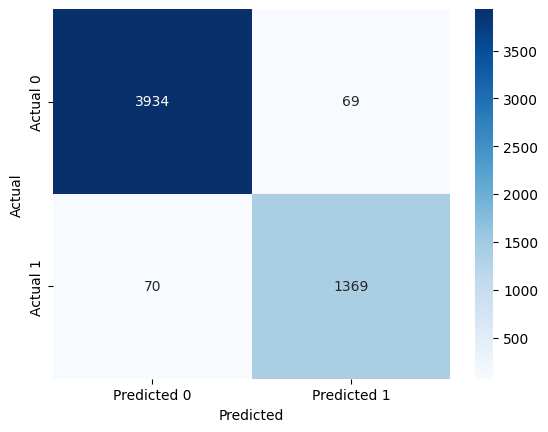

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'actual_labels' are your model's predictions and the true labels from your test dataset
accuracy = accuracy_score(actual_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(actual_labels, predictions, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(actual_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
# Define the directory where you want to save the model and tokenizer
model_save_path = "./my_model"

# Save the trained model
model.save_pretrained(model_save_path)

# Save the tokenizer
tokenizer.save_pretrained(model_save_path)

('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.txt',
 './my_model/added_tokens.json')

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [28]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [32]:
# Example random sentence
random_sentence = "We will be updating our software as next step for bug fixing"

# Prepare the sentence for the model
inputs = tokenizer(random_sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Move the inputs to the same device as the model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Predict
with torch.no_grad():
    outputs = model(**inputs)

# The outputs are logits, so you need to apply a softmax function to convert them to probabilities
probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Get the highest probability to determine the predicted class
predicted_class = torch.argmax(probabilities, dim=-1).item()

# Assuming class 0 is 'Non-Action' and class 1 is 'Action' for binary classification
classes = ["Non-Action", "Action"]
print(f"Predicted class for the sentence '{random_sentence}' is: {classes[predicted_class]} ({predicted_class}) with probability {probabilities[0][predicted_class].item()}")


Predicted class for the sentence 'We will be updating our software as next step for bug fixing' is: Action (1) with probability 0.9996476173400879
